#        Association Rules

###Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [2]:
!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [4]:
data=pd.read_csv("book.csv")
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
data.shape

(2000, 11)

## Apriori algorithm

In [6]:
frequent_itemsets=apriori(data,min_support=0.1)

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [7]:
print(len(frequent_itemsets))

39


In [11]:
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
print(frequent_itemsets.head())

   support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)


C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
frequent_itemsets.sort_values("support",ascending=False).head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


In [13]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=0.7)
print(rules.head())

  antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)  (YouthBks)              0.4230              0.2475    0.165   
1  (YouthBks)  (ChildBks)              0.2475              0.4230    0.165   
2   (CookBks)  (ChildBks)              0.4310              0.4230    0.256   
3  (ChildBks)   (CookBks)              0.4230              0.4310    0.256   
4  (DoItYBks)  (ChildBks)              0.2820              0.4230    0.184   

   confidence      lift  leverage  conviction  
0    0.390071  1.576044  0.060308    1.233750  
1    0.666667  1.576044  0.060308    1.731000  
2    0.593968  1.404179  0.073687    1.421069  
3    0.605201  1.404179  0.073687    1.441240  
4    0.652482  1.542511  0.064714    1.660347  


In [14]:
rules[(rules.support>0.015) & (rules.confidence>0.4)].sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
55,(RefBks),"(CookBks, ChildBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
78,"(GeogBks, ChildBks)",(ArtBks),0.1950,0.2410,0.1020,0.523077,2.170444,0.055005,1.591452


In [15]:
rules['lhs items']=rules['antecedents'].apply(lambda x:len(x))
rules[rules['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'ArtBks,ChildBks'),
  Text(0, 1.5, 'ArtBks,CookBks'),
  Text(0, 2.5, 'ArtBks,GeogBks'),
  Text(0, 3.5, 'ChildBks,YouthBks'),
  Text(0, 4.5, 'CookBks,ChildBks'),
  Text(0, 5.5, 'CookBks,YouthBks'),
  Text(0, 6.5, 'DoItYBks,ArtBks'),
  Text(0, 7.5, 'DoItYBks,ChildBks'),
  Text(0, 8.5, 'DoItYBks,CookBks'),
  Text(0, 9.5, 'DoItYBks,GeogBks'),
  Text(0, 10.5, 'GeogBks,ChildBks'),
  Text(0, 11.5, 'GeogBks,CookBks'),
  Text(0, 12.5, 'RefBks,ChildBks'),
  Text(0, 13.5, 'RefBks,CookBks')])

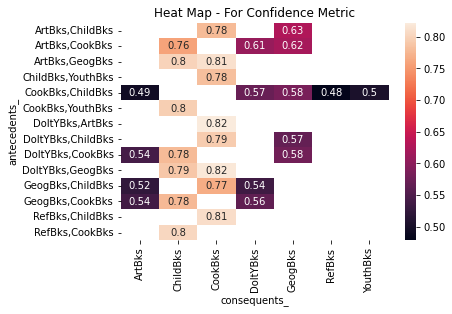

In [16]:
rules['antecedents_']=rules['antecedents'].apply(lambda a: ','.join(a))
rules['consequents_']=rules['consequents'].apply(lambda a: ','.join(a))
pivot=rules[rules['lhs items']>1].pivot(index='antecedents_',
             columns='consequents_',values='confidence')
#generate heatmaps
sns.heatmap(pivot,annot=True)
plt.title('Heat Map - For Confidence Metric')
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [17]:
rules_li=association_rules(frequent_itemsets,metric="lift",min_threshold=0.7)


In [18]:
print(rules_li.shape)

(100, 9)


In [19]:
rules_li['lhs items']=rules_li['antecedents'].apply(lambda x:len(x))
rules_li[rules_li['lhs items']>1].sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
54,"(CookBks, ChildBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'ArtBks,ChildBks'),
  Text(0, 1.5, 'ArtBks,CookBks'),
  Text(0, 2.5, 'ArtBks,GeogBks'),
  Text(0, 3.5, 'ChildBks,YouthBks'),
  Text(0, 4.5, 'CookBks,ChildBks'),
  Text(0, 5.5, 'CookBks,YouthBks'),
  Text(0, 6.5, 'DoItYBks,ArtBks'),
  Text(0, 7.5, 'DoItYBks,ChildBks'),
  Text(0, 8.5, 'DoItYBks,CookBks'),
  Text(0, 9.5, 'DoItYBks,GeogBks'),
  Text(0, 10.5, 'GeogBks,ChildBks'),
  Text(0, 11.5, 'GeogBks,CookBks'),
  Text(0, 12.5, 'RefBks,ChildBks'),
  Text(0, 13.5, 'RefBks,CookBks')])

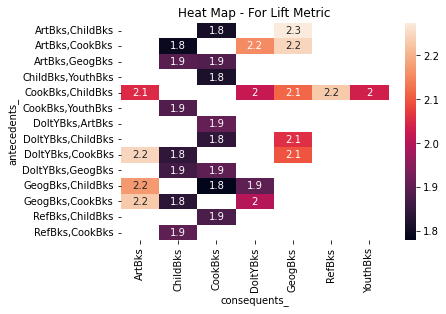

In [20]:
rules_li['antecedents_']=rules_li['antecedents'].apply(lambda a: ','.join(a))
rules_li['consequents_']=rules_li['consequents'].apply(lambda a: ','.join(a))
pivot=rules_li[rules_li['lhs items']>1].pivot(index='antecedents_',
             columns='consequents_',values='lift')
#generate heatmaps
sns.heatmap(pivot,annot=True)
plt.title('Heat Map - For Lift Metric')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
